# Exploratory Data Analysis

In [1]:
%matplotlib inline

### I've conducted some Exploratory Data Analysis on a set of example data. This was completed as part of the Data Science course at Johns Hopkins. The example data here was given without context, so a few assumptions were made in the analysis of this dataset. 

To start at EDA, let's take a look at what the rows of this dataset contains so we can get some idea of what kind of data we're looking at.

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This appears to be a dataset regarding insurance charges for people. Each record represents a person, and has information regarding age, gender, body mass index, how many children they have, whether or not they are a smoker, which region they reside in, and along with a column for charges. It is unclear whether charges refers to how much their insurance plans cost, how much their insurance plan covers, or perhaps charges they billed through their insurance. The precision on the charges is also rather suspicious, as normally they would just go to two decimal places for values about money, so it could be the case that this column isn't money at all. 

We should look at all of the data types for each variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The variables that we are looking at are as follows:
- [age](#age)
- [sex](#sex)
- [bmi](#bmi)
- [children](#children)
- [smoker](#smoker)
- [region](#region)
- [charges](#charges)

<a id="age"></a>
### age

`age` is the age of the person who has incurred charges. I'm interested in finding out some basic descriptive statistics of this data. First, let's look at the Tukey 5 for this variable. 


In [5]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

We can make a few observations about the age of the people in this dataset. The lowest age observed in the dataset is 18 years old, while the oldest observed age is 64. 25% of the people in observed in the dataset is between the ages of 18 and a little under 27. The median age is 39 years old, which means that half of the people are younger than 39 (but not older than 18), and half are older than 39 (but not older than 64). 75% of the observed people in this dataset is younger than 51. We know that the average age is around 39 years old, and that the standard deviation is around 14 years. 

We can also look at some dispersion metrics for `age`, like Tukey dispersion metrisc. We can get a sense of the range of the data so we know how many years the ages of the people span. 

In [6]:
from IPython.core.display import display, HTML
def calculate_tukey_five(data):
    min, q1, q2, q3, max = np.concatenate([[np.min(data)], stats.mstats.mquantiles( data, [0.25, 0.5, 0.75]),[np.max(data)]])
    data = {"Min": min, "Q1": q1, "Q2": q2, "Q3": q3, "Max": max}
    return data

def calculate_tukey_dispersion(five):
    data = {
        "Range": five["Max"] - five["Min"],
        "IQR": five["Q3"] - five["Q1"],
        "QCV": (five["Q3"] - five["Q1"]) / five["Q2"]
    }
    return data

def display_dict(m, precision = 3):
    table = "<table>"
    for item in m.items():
        table += ("<tr><th>{0}</th><td>{1:." + str(precision) + "f}</td></tr>").format(*item)
    table += "</table>"
    return display(HTML(table))
age_five = calculate_tukey_five(df.age)
age_dispersion = calculate_tukey_dispersion(age_five)
display_dict(age_dispersion)

Range,46.000
IQR,24.050
QCV,0.617


From the Tukey dispersion metrics, we can see that the range of the `age` variable is 46 years. The interquartile range is 24.05, which is the difference between the third quartile and the first quartile. The QVC, or the quartile coefficient of variation, is a robust measure of scale that measures how spread out data sets are relative to each other. The QVC of age is 0.617. Comparing the interquartile range to the range of the data, we get some sense of the spread of the data.

We can chart the data also to get more of a sense of the dispersion. We can try and increas the amount of bins (the default is 10) to get a slightly more granular view of the data. Since we know that the range of the age variable is 46 years, 15 bins will make about 3 years per bin, which is good for enough abstraction without losing too much detail.

Text(0.5, 1.0, 'Distribution of Age')

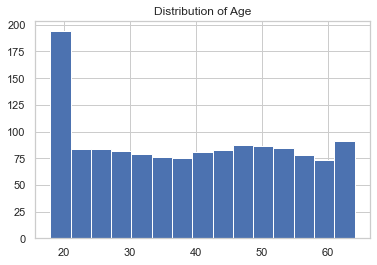

In [7]:
df.age.hist(bins=15)
plt.title('Distribution of Age')

From the chart, we can see a very high amount relative to all of the others in the very first bucket. All of the other rage ranges seem to be relatively uniform and flat. Let's try plotting it with a boxplot to see if we can get more insights about how the age is distributed.

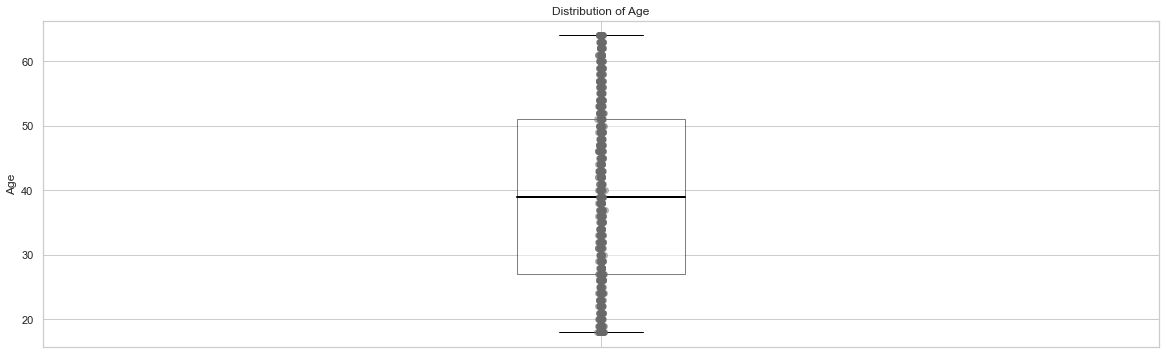

In [8]:

def restyle_boxplot(patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set( facecolor='#FFFFFF', alpha=0.5)

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "age"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot(patch)
axes.set_title("Distribution of Age")
axes.set_ylabel("Age")
x = np.random.normal(1, 0.001, size=len(df["age"]))
axes.plot(x, df["age"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

With these two charts, we can come to the observation that the age variables is skewed slightly toward the younger side. It begs the question whether there is a certain age that has a most common age -- perhaps there is an age where everyone is creating charges for insurance, but then later drop out. Let's try and count and sort the ages.

In [9]:
df.value_counts('age')

age
18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
dtype: int64

We can see that the ages of 18 and 19 have a much higher count of people than all the rest of the ages, over double the other ages. All of the other ages have around 22-29 people.  

<a id="sex"></a>
### sex

Let's see what kind of categories that this variable can take on. Assumedly it is Male/Female, but there may be individuals who are non-gender-conforming or intersex. This is relevant as it relates to insurance, which from a medical standpoint is perhaps relevant in assessing treatment options and, therefore, the amount of charges for insurance



In [10]:
df.sex.unique()

array(['female', 'male'], dtype=object)

It appears that our original assumption is correct in that this dataset takes into account only Male/Female. Let's see what the relative number counts are for this variable

In [11]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

The coutns of male/female indicate that they are almost nearly equal. There are 14 more meales than females observed in this dataset. We can chart them to see what they look like compared to each other, but we can expect that the chart will just be a bar chart of bars of nearly eequal size.

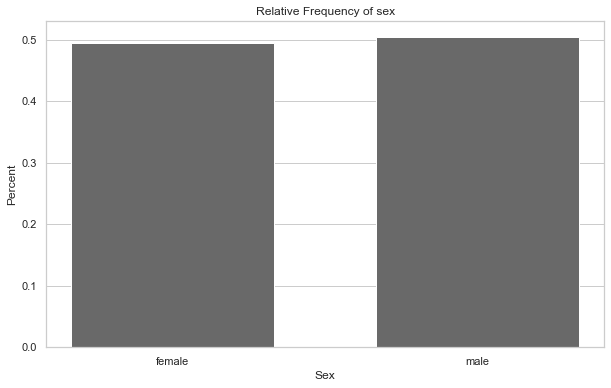

In [12]:
counts = df['sex'].value_counts().sort_index()
proportions = df['sex'].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Sex")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of sex")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)


plt.show()
plt.close()


This result is as expected. 

<a id="bmi"></a>
### bmi

We can now look at `bmi`. Assmuedly, this is the observed Body Mass Index of the individuals in this dataset. Since this is a numerical variable, we can calculate typical descriptive statistics like the Tukey 5 as well as the mean and

In [13]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

From these descriptive statistics, we know that the lowest observed value of `bmi` is 15.96. 25% of the values lie between 15.96 and 26.287. The median of `bmi` is 30.4. 75% of the avlues lie between 15.96 and 34.7. The maximum observed value is 53.13. The average BMI in this dataset is 30.66, with a standard deviation of 6.10. 

From doing a little bit of [background research](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/), we know that if your BMI is :

- Below 18.5, you are in the underweight range. 
- Between 18.5 and 24.9, you are in the healthy weight range
- Between 25 and 29.9, you are in the overweight range.
- Between 30 and 39.9, you are in the obese range. 

And that for most adults an ideal BMI is in the 18.5 to 24.9 range. Depending on where you look, obesity is classed into [3 different](https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi) obesity classes. 30-34.9 being Obese I, 35-39.9 being Obese II, and 40+ being Obese III. 

Since the first quartile is at 26.287 and the max is at 53.13, we know that over 75% of our observed dataset are either overweight or obese. 25% of our observed dataset is either underweight or in a healthy range. Let's try and see what the dispersion metrics are like for this dataset by looking at the Tukey dispersion metrics. 

In [14]:
bmi_five = calculate_tukey_five(df.bmi)
bmi_dispersion = calculate_tukey_dispersion(bmi_five)
display_dict(bmi_dispersion)

Range,37.170
IQR,8.414
QCV,0.277


Based on our research earlier, we know that healthy BMI is between 18.5 to 24.9, or a range of 6.4. This gives us a range to compare against and gives us a sense of what kind of observed values we're dealing with. The range of the whole dataset is much larger than the range for a healthy BMI. The IQR is a bit closer to a range of 6.4, but we know from earlier research that it is from 26.287 (QI) to 34.7 (QIII), or roughly encompassing the range of overweight to Obeses I. 

The QCV is 0.277. Comparatively, BMI is less dispersed than is age. 

From these descriptive statistics, we know that most of the people observed in this dataset are on the overweight side. Let's chart the data in a boxplot to see how the people observed in this dataset are dispersed. 

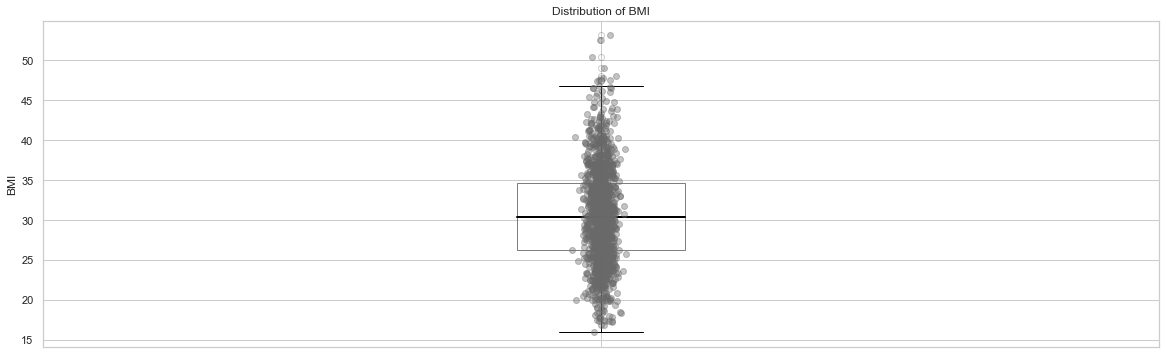

In [15]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "bmi"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot(patch)
axes.set_title("Distribution of BMI")
axes.set_ylabel("BMI")
x = np.random.normal(1, 0.007, size=len(df["bmi"]))
axes.plot(x, df["bmi"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

We can see that the data is slightly right skewed toward higher BMIs. Let's try binning the data according to the BMI ranges we found earlier to see the relative frequencies of BMI of the observed persons in this dataset. 

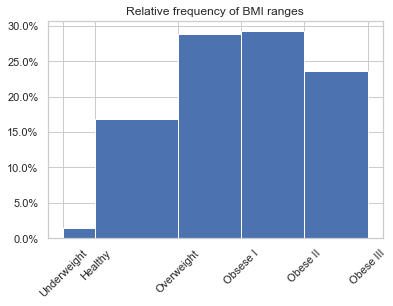

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
bins = [15.960, 18.5, 25, 30, 35, 40]

#Binning in this way will include the rightmost bin values into the 40+ bin.
plt.hist(np.clip(df['bmi'], bins[0], bins[-1]), weights=np.ones(len(df)) / len(df), bins=bins)
ax = plt.gca()
ax.set_xticks(bins)
ax.yaxis.set_major_formatter(PercentFormatter(1))

names = ['Underweight', 'Healthy', 'Overweight', 'Obsese I', 'Obese II', 'Obese III']

ax.set_xticklabels(names, rotation = 45)
ax.set_title("Relative frequency of BMI ranges")


plt.show()

The plotted histogram shows that only a little over 15% of the individuals observed in this data set are in the healthy designation BMI. The vast majority of the other individuals observed are overweight or obese. 

Obesity is a major epidemic in America and has major implications in terms of health problems. Obesity causes a [wide variety of issues with health](https://www.cdc.gov/obesity/adult/causes.html), including but not limited to diabetes, hypertension, heart disease, and some cancer.

<a id="children"></a>
### children

Children, though we measure these numerically, are actually a categorical, ordinal variable, much like the number of bathrooms in a house (though, unlike bathrooms, one cannot have 3/4 of a child). 

We know from the describe() function earlier that children is an integer. We also know that it can take on numbers like 0, 1, or 3. Let's start with the Tukey 5 descriptive statistics to see the quartiles of this variable.

In [17]:
children_five = calculate_tukey_five(df['children'])
display_dict(children_five)

Min,0.000
Q1,0.000
Q2,1.000
Q3,2.000
Max,5.000


We can see that the minimum value is 0 children (that is, even though we knew that some observed persons in this dataset had 0 children, we now know that there are no people people with _less_ than 0 children). The first quartile is at 0 still, which means that 25% of the observed persons in this dataset have no children. The median is 1, which means that 50% of the observed persons have 1 child or fewer. This is probably explained by the fact that many of the people in this dataset are 18 or 19 years old, which is on the younger side for having children. The 3rd quartile is 2 children, which means that 75% of the observed persons in this data set have 0-2 children. The maxmimum number of children that the people in this dataset have is 5 children. 

We can use a histogram to visualize the relative distribution of the amount of children people have. 

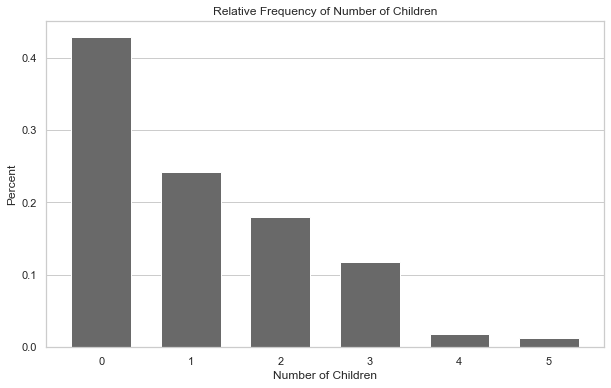

In [18]:
counts = df['children'].value_counts().sort_index()
proportions = df['children'].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Number of Children")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Number of Children")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)


plt.show()
plt.close()

From this chart we can see that the majority of individuals observed in this dataset do not have children, a little over 40%. The more children a person has, the less their frequency relative to the other groups. People who have one child comprise around 25% of the persons observed in the dataset. People who have two children are a little under 20% of the persons in the dataset, and people who have 3 or more children are a bit over 10 percent of the dataset. 

It is fairly atypical to have four or five children (in a relaative sense), so it does stand up to scrutiny that the relative frequency of people who have four or five children is quite low compared to the other numbers of children. 

It is also probably likely that the number of children will increase along with age, as older people have had more time to have more children. 


It is also not entirely clear what constitutes a "child". It could simply be whether the person in question has any children at all, or any children within a certain age range (covered under certain plans). The relevance of this is that, for health insurance, it matters whether or not [your child is over 26 years of age](https://www.hhs.gov/healthcare/about-the-aca/young-adult-coverage/index.html#:~:text=Under%20current%20law%2C%20if%20your,plan%20even%20if%20they%20are%3A&text=Not%20financially%20dependent%20on%20their,enroll%20in%20their%20employer's%20plan). We also do not know whether any of these children have their own health insurance, or that these children are the children covered under this same person's plan. 

<a id="smoker"></a>
### smoker

Earlier we saw from the describe() function that `smoker` is an data type of object, and we saw from some rows that they can take on the values of 'yes' or 'no'. It is unclear if this includes the "sometimes" option that we are familiar with seeing when filling out health forms at clinics or hospitals. Like we did with `sex`, we can try and see what kind of values this variable can take on.

In [19]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

The `smoker` variable only takes on values of yes and no. Rather than being saved as a object variable, this should have been saved as a Boolean, binary variable. It is a categorical value that can only take on two values. Smoking is likely related to the charges. Smoking has numerous deleterious effects on health that have been well documented, so it makes sense that the amount one pays for insurance coverage would be more costly depending on whether or not one smokes. Some background research tells us that in 2019, [14% of adults in the US smoked cigarettes](https://www.google.com/search?q=%25+of+smokers&rlz=1C5CHFA_enTW726TW726&oq=%25+of+smokers&aqs=chrome..69i57j69i59j69i65l3j69i60l3.4585j0j7&sourceid=chrome&ie=UTF-8). We can see if this aligns with the percentage of people in the dataset who are observed to be smokers by looking at the relative frequencies of yes vs. no. 

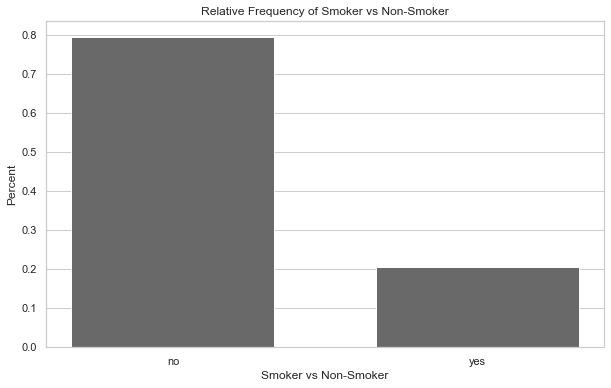

In [20]:
counts = df['smoker'].value_counts().sort_index()
proportions = df['smoker'].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Smoker vs Non-Smoker")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Smoker vs Non-Smoker")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)


plt.show()
plt.close()

From the chart, we can see that the percentage of smokers in the observed dataset is around 20%, which is considerably higher than the current national average. Some more background reserch reveals that [smoking is tied to lower in come](https://www.cdc.gov/tobacco/disparities/low-ses/index.htm), and that [health insurance coverage is also related to income](https://www.healthsystemtracker.org/brief/how-affordability-of-health-care-varies-by-income-among-people-with-employer-coverage/). 

An open question about this variable is that we do not know if `smoker` distinguishes between former smoker or current smoker, or if they have [quit recently enough to affect their health insurance costs](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1360912/). We also do not know if this data is self reported or [tested by the insurance company](https://www.nyhealthinsurer.com/2012/blog/will-smoking-affect-my-health-insurance-rate).

We also do not know whether or not smoker refers to traditional cigarettes, or if it includes the use of e-cigarettes and other nicotine products, each of which have different health effects but are commonly included in the same category as smoking.


<a id="region"></a>
### region

Next we can look at `region`. We know from earlier when using the describe() method that `region` is a data of type Object, which usually implies a String. We know from looking at a few rows that the kind of values that `region` can take on are things like "southwest" and "northwest". This probably refers to the region of the United States that the person observed in the dataset resides in. That would make this a categorical, nominal variable. Let's take a look at what kind of values that `region` can take on.

In [21]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

The variable `region` can take on the values 'southwest', 'southeast', 'northwest', 'northeast'. These do not correspond to the usual regions that we generally see used to divide up the US. 

There are a few that are used. For instance, the Census Bureau designates US regions as:
- Northeast
- Midwest
- South
- West

It also could be the case that this insurance data isn't about the United States at all! Perhaps these regions refer to different regions of one state, or even one city. We simply don't know enough about the dataset to know. 

We should look to see whether there are any interesting or weird patterns we can find by looking at the relative frequencies of each region. 

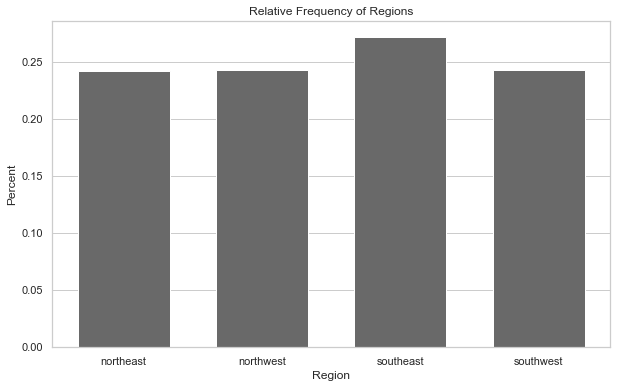

In [22]:
counts = df['region'].value_counts().sort_index()
proportions = df['region'].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Region")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Regions")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)


plt.show()
plt.close()

The relative frequency of each region is all around 25%, with the southeast being a more over represented as compared to the other regions. It is very strange that the regions would all be so close to each other, as there are usually differences in population between geographical regions. 

It could be the case that `region` doesn't refer to the geographic location of where the patient is from, but rather the region assigned to the patient based on the capacity of the insurance company to balance work loads. In any case, we do not know enough about the dataset to make any calls regarding whether or not this is atypical of what we are expecting, but it is definitely strange in that it is so equally divided amongst the four possible regions. 

<a id="charges"></a>
### Charges

The `charges` variable is probably the most interesting variable. As we have seen earlier, it is a numerical variable, of a float, that has a suspicious level of precision given what it is supposed to represent, which should be dollar amounts. Given no other information other than "charges", let's assume these are charges made by each person in the database for their health insurance. Generally, people don't have too many health problems (though, given our previous explorations into this data, we know that the people observed in this dataset is not in the healthiest of weight ranges, nor do they smoke less than the national average). As a result, we shouldn't expect the charges to be too expensive on the whole. There should be some high values for large health problems like surgeries or emergencies. 

Since this is a numerical variable, we can look at some descriptive statistics to get an idea of the prices these charges range. 

In [23]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

We can see that the lowest amount charged is around \\$1,112.87 and the highest charges are at \\$63,770. 25\% of the persons observed in the dataset have had insurance charges between \\$1,1121.87 and \\$4,740.29. Half of the persons observed in the dataset have charges lower than \\$9,382.03, while half have charges above that number. 75\% of the persons in the data set have charges lower than \\$16,639.91. The average amount charged is \\$13,270, which is much larger than the median. This indicates that the data may be right skewed. We can visualize this to see if it is indeed the case, using a histogram.

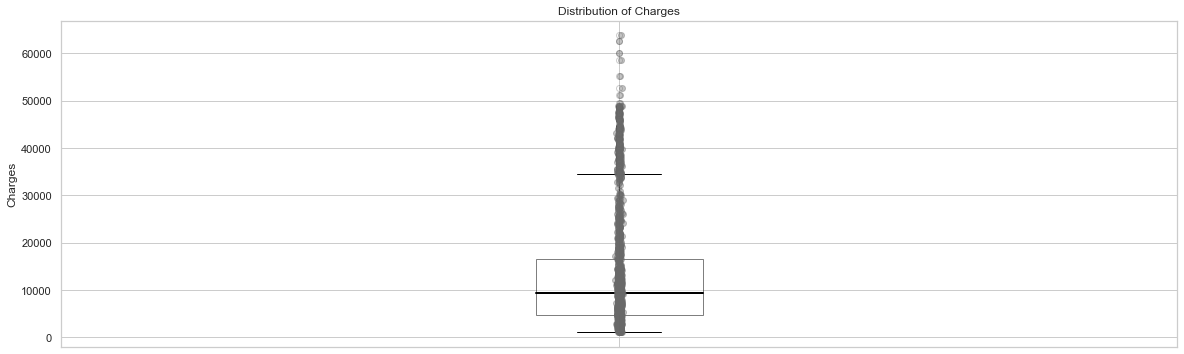

In [24]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df['charges'], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot(patch)
axes.set_title("Distribution of Charges")
axes.set_ylabel("Charges")
x = np.random.normal(1, 0.001, size=len(df['charges']))
axes.plot(x, df['charges'], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

The distribution is clearly skewed, but it is skewed to the point that we can't see anything interesting. Let's try binning these continuous variables and plotting this data in a histogram to see if we can see any useful or interesting in terms of patterns and structure. 

Text(0.5, 1.0, 'Distribution of Charges, 30 bins')

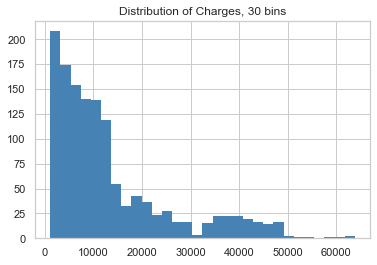

In [25]:
plt.hist(df['charges'], bins=30,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('Distribution of Charges, 30 bins')


The distribution of the data is one that is very right skewed. There seems to be small bumps after the initial large drp off after \\$10,000. These might be related to how many health problems that these people are charged for, which, as we know from earlier background research, is influenced by things like their `bmi` or whether they are a `smoker`. 

## Pariwise EDA

Since `charges` is the most interesting variable in the dataset, and is most likely influenced by the other variables (also, the instructions seem to circle around charges anyway), it makes the most sense to investigate how the other variabels influence charges. As such, let us assume that our research question is what determines the charges incurred by people in this dataset. 

The pairwise relationships that we're going to be investigating are: 

- [Charges vs. age](#cva)
- [Charges vs. smoker](#cvs)
- [Charges vs. bmi](#cvb)
- [Charges vs. sex](#cvsx)
- [Charges vs. children](#cvc)
- [Charges vs. region](#cvr)



<a id="cva"></a>
    
### Charges vs. age 

We can try and look at how these two variabels are related by looking at correlation statistics. We were introduced to Spearman's rank correlation coefficient and Pearson's correlation coefficient. Spearman's $\rho$ will describe how well the relationship between `charges` and `age` can be described using a monotonic function. Pearson's correlation between two variables will assess linear correlation. 

In [26]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    print( "r   =", stats.pearsonr(data[x], data[y])[0])
    print( "rho =", stats.spearmanr(data[x], data[y])[0])
    
correlation(df, 'charges', 'age')

Correlation coefficients:
r   = 0.2990081933306476
rho = 0.534392133771846


The Pearson's correlation statistic is not very strong. The Spearman's $\rho$ is slightly over 0.5, which means that there is some evidence for a positive correlation. The closer each of these values are to 1 or -1, the stronger the relationship. We should plot the data to see if there are any underlying structures to the data that we cannot see purely from correlation statistics. 

<AxesSubplot:title={'center':'Charges by Age'}, xlabel='charges', ylabel='age'>

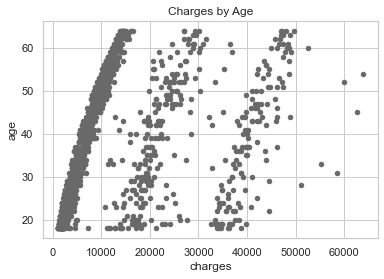

In [27]:
df.plot.scatter('charges','age', color = 'dimgrey', title='Charges by Age')

At a cursory glance it is clear that there is at least some interesting structure to the data. The charges and age seem to be banded at various points, and there are a few stragglers between each of the bands. We should adjust the transparency to account for overplotting. 


<AxesSubplot:title={'center':'Charges by Age'}, xlabel='charges', ylabel='age'>

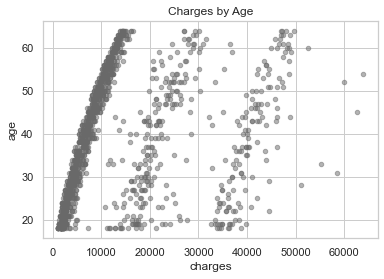

In [28]:
df.plot.scatter('charges','age', color = 'dimgrey', title='Charges by Age', alpha=0.5)

From the adjustment of the alpha, we can see that the first band is the most dense. The second and third bands at the higher charges are less dense comparatively. The most dense band is at the cheapest point, and the charges for each person increases with age. The second and third bands seem start at more expensive charge brackets, one at around \\$15,000 and one at around \\$35,000. These two bands also increase according to age. These increases probably account for the slight monotonic relationship described by the Spearman's $\rho$ coefficient. This also tells us that any patterns we might find with the second and third bump when looking purely at histogram counts might be hidden by how dense the values are with the first band. 

In any case it is abundantly clear that whoever decides the insurance charges has bracketed the individuals into three different categories. 

The cheapest category probably accounts for those people who have a healthier BMI and make good choices with regards to their health (smoking, eating healthy foods...). Our background research earlier had shown that smoking can significantly increase the amount of money that one pays for insurance. 

However, since `smoker` can only take on two different values, there should be some other explanation for the different bands. We should keep this in mind for later for doing a bit deeper digging. 

<a id="cvs"></a>
### Charges vs. Smoker

Based on earlier background research, we know that smoking will affect the amount of charges one pays for their health insurance.

First, we should look at categorical correlation to see if there are any differences in descriptive statistics between the `charges` for smoker versus non-smoker. 

In [29]:
def describe_by_category(data, numeric, categorical):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    print(grouped_y)
    
describe_by_category(df, 'charges', 'smoker')

         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  


Right away we can see that the average charges for a smoker is almost 4 times more than it is for a non smoker. The minimum value for a smoker starts at \\$12,829, whereas the minimum charges for a non-smoker starts at \\$1,121. It appears that being a smoker is extremely expensive in terms of health insurance charges.

We should also try and visualize the data if we can, in order to uncover any structures that are hidden away by descriptive statistics. A way that we can investigate how this binary variable affects the cost is to split and plot the data between smoker and non-smoker, and compare the charges between the split data. We are only interested in seeing if there are significant differences in charges between these two groups, and seeing if any interesting patterns appear.

Text(0.5, 1.0, 'Charges for Non Smokers')

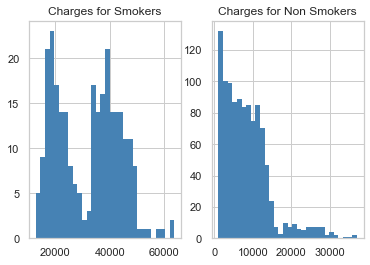

In [30]:
df_smoker = df[df['smoker'] == 'yes']
df_non_smoker = df[df['smoker'] == 'no']

fig, axes = plt.subplots(1,2)


axes[0].hist(df_smoker['charges'], bins=30,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');


axes[1].hist(df_non_smoker['charges'], bins=30,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

axes[0].set_title('Charges for Smokers')
axes[1].set_title('Charges for Non Smokers')


We can see that there is a pretty stark contrast between smoker and non smoker. For one, the x-axis for smokers starts at a much, much higher number than does the charges for non-smokers, as we have seen previously from the descriptive statistics for each category. From this portion, we can see that there are two clear groups within the smoker category. Since the number of smokers are greatly outnumbered by the number of non-smokers, it was probably the case that these two smaller groups were hidden by the size of the non-smoker category. We can try to visualize the charges like we did originally, but add in the colors to distinguish the smokers from the non-smokers to see what we had missed. 

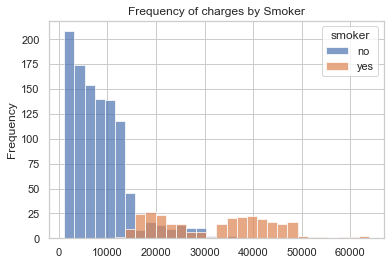

In [31]:
df.pivot(columns="smoker", values="charges").plot.hist(bins=30, alpha=0.7, title = 'Frequency of charges by Smoker')
plt.show()

The two smaller orange bumps that we see after the first large initial blue bump correspond to smokers and non-smokers respectively. It is likely that these three bumps also correspond to the three bands that we saw earlier when investigating `age` vs `charges`. There are also some unexplained overlaps etween the first small smoker bump and the right tail of the non-smoker category. Since the tail of the non-smoker category is almost as large as the first small bump of the smoker category, this difference cannot be plainly explained by statistical noise. There should be some other variables that we haven't yet considered. 



<a id="cvb"></a>
### Charges vs. BMI

From the earlier EDA we conducted, we considered that BMI has to do with obesity and health. How healthy an individual is should definitely play into how heavily one would be charged for health insurance. As such, we should investigate how charges relates to BMI.

First we should look at the correlation statistics between BMI and charges to see if there is any relationship worth investigating.

In [32]:
correlation(df, 'charges','bmi')

Correlation coefficients:
r   = 0.1983409688336288
rho = 0.11939590358331147


There does not seem to be a strong relationship we can infer from either of the correlation statistics.

Let's try plotting the two variables on a scatter plot to see if there are any structures that are not described by statistics. We should keep in mind, like earlier, to add transparency so that we don't fall victim to overplotting.

Text(0.5, 1.0, 'Charges by BMI')

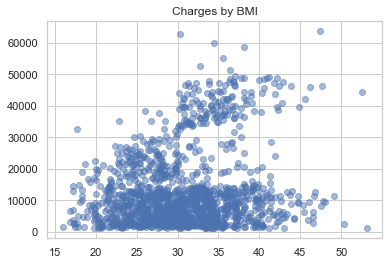

In [33]:
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.title('Charges by BMI')

The data appears to have some blobs where the charges have higher value. One blob, the topmost blob, seems to have very few values below a certain number of BMI. From our earlier research, we know that a BMI of 30 is where a person is considered Obese. We should try and overlay a line where that cutoff is to confirm our suspicion about the blob. The middle blob appears to have fewer values above a certain BMI.

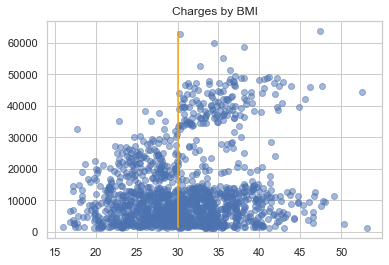

In [34]:
plt.scatter( df['bmi'], df['charges'],alpha=0.5)
plt.title('Charges by BMI')
plt.vlines(30, df['charges'].min(), df['charges'].max(), colors = 'orange')

The topmost blob indeed has almost no values below thirty. Whats more, it appears that the charges are increasing with the BMI values within the blob. This may mean that, depending on some other variable(s), BMI does start to matter. The designation of Obese seems is the cutoff point for increasing charges. For the middle blob, it appears that charges may also be increasing according to BMI. 

There is a suspicion that, right above the bottommost, densest blob, is a cutoff line based on some variable. The price point there appears to be around \\$12,000. This corresponds pretty well with the minimum charges for smokers that we saw earlier. Let's just add a line at the minimum value for smokers to investigate a bit further, but we should do a deeper dive later as we are only investigating one pairwise relationship right now. 

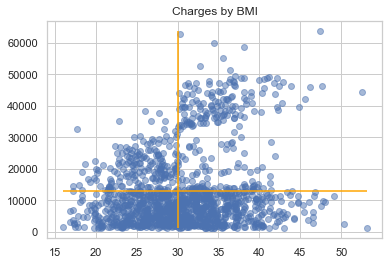

In [35]:
plt.scatter( df['bmi'], df['charges'],alpha=0.5)
plt.title('Charges by BMI')
plt.vlines(30, df['charges'].min(), df['charges'].max(), colors = 'orange')
plt.hlines(12829.4551, df['bmi'].min(), df['bmi'].max(), colors = 'orange')

The points above the "smoker" line seems to have a positively correlated relationship. We should keep this in mind for later. 

<a id ="cvsx"></a>
### Charges vs. Sex

We should look at whether or not men and women get charged differently. Similar to how we analyzed `smoker` we start off with descriptive statistics by category in order to do this. We can see, for instance, if the averagae charges for women are higher than for men, or vice versa.

In [36]:
describe_by_category(df, 'charges', 'sex')

        count          mean           std        min        25%         50%  \
sex                                                                           
female  662.0  12569.578844  11128.703801  1607.5101  4885.1587  9412.96250   
male    676.0  13956.751178  12971.025915  1121.8739  4619.1340  9369.61575   

                 75%          max  
sex                                
female  14454.691825  63770.42801  
male    18989.590250  62592.87309  


The mean for men is slightly higher than it is for women. However, women start at \\$1,607.51 as compared to \\$1,121.87 for men for minimum values. The maxmimum value for both genders is about the same, at \\$63,770.43 for men and \\$62,592.87 for women. 

One big differce is the third quartile. For women, 75% of all women pay less than \\$14,454.69, where as 75\% of all men pay less than \\$18,989.59. The first and second quartiles are about equal. Men start at a much higher number than women in the 3rd quartile, which indicates that proportionally, more men are incurring higher charges. 

To see if there is any structure in this data, we should try and chart these two categories in histograms side by side.

Text(0.5, 1.0, 'Distribution of Charges for Men')

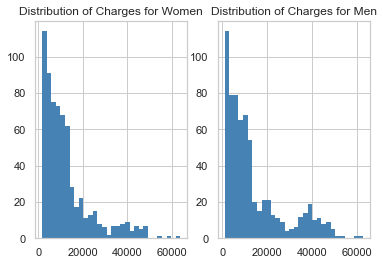

In [37]:
df_female = df[df['sex'] == 'female']
df_male = df[df['sex'] == 'male']

fig, axes = plt.subplots(1,2)


axes[0].hist(df_female['charges'], bins=30,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');


axes[1].hist(df_male['charges'], bins=30,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

axes[0].set_title('Distribution of Charges for Women')
axes[1].set_title('Distribution of Charges for Men')


Here we see the difference that was pointed out earlier by the categorized descriptive statistics. There is a slight bump around the both the \\$20,000 and \\$40,000 mark that is less pronounced for women. Other than this bump, the histograms seem structurally more or less the same.

The difference in the fourth quartile is probably similar to the blob that we saw earlier in terms of BMI. There may be some other variable(s) that will influence the charges together with sex. Perhaps it is a "men of a certain age" phenomenon, or perhaps male smokers are especially in danger, or some combination of both.

<a id= "cvc"></a>
### Charges vs. Children

Let's investigate how the number of children an individual has will affect charges. Since children is not a continuous variable, we should try and get some categorized descriptive statistics first to see if there are any significant differences of charges for the number of children. 

In [38]:
describe_by_category(df,'charges','children')

          count          mean           std        min          25%  \
children                                                              
0         574.0  12365.975602  12023.293942  1121.8739  2734.421150   
1         324.0  12731.171832  11823.631451  1711.0268  4791.643175   
2         240.0  15073.563734  12891.368347  2304.0022  6284.939438   
3         157.0  15355.318367  12330.869484  3443.0640  6652.528800   
4          25.0  13850.656311   9139.223321  4504.6624  7512.267000   
5          18.0   8786.035247   3808.435525  4687.7970  5874.973900   

                  50%           75%          max  
children                                          
0          9856.95190  14440.123825  63770.42801  
1          8483.87015  15632.052050  58571.07448  
2          9264.97915  20379.276748  49577.66240  
3         10600.54830  19199.944000  60021.39897  
4         11033.66170  17128.426080  40182.24600  
5          8589.56505  10019.943975  19023.26000  


We can see that the average charges for individuals with five children are the lowest by a significant margin. Then followed by those with no children or one child, those with four children, and then finally those with two or three children.

The minimum values for each category seem to increase with each additional child. Starting from no children, the minimum value is \\$1,121. The minimum value for one child is \\$1,711, and so on. This drops off at around the fifth child, for values up to the first quartile and the median. At the third quartile, the relationship seems to take on more of a bell shape for each child, bulging at the two and three child mark and then falling back off. There doesn't seem to be a relationship for the maximum values of each child category. 

Let's look at correlation statistics to see if there is actually any linear or monotonic relationship between these two variables, or if we were just being misled into seeing things.

In [39]:
correlation(df, 'charges', 'children')

Correlation coefficients:
r   = 0.0679982268479048
rho = 0.13333894319168219


We were indeed misled! There is almost no relationship between these two variables.

However, it could be the case that purely looking at the descriptive statistics can be misleading. Let's try to visualize the multiboxplot to look at the overall shape for each child category for more specifics.

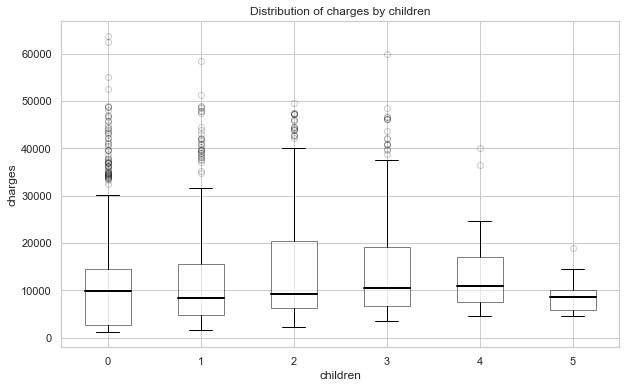

In [40]:
def multiboxplot(data, numeric, categorical, skip_data_points=True):
    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
    restyle_boxplot( patch)

    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))

    plt.show()
    plt.close()

multiboxplot(df, 'charges', 'children')
    

The imaginary line going through the medians is almost nearly flat. The only interesting thing of note is that people with four or five children seem to have significantly smaller ranges for charge than do the people of the other categories. Perhaps we can get a glimpse of structure if we try to visualize this data on a scatter plot instead. 


Text(0.5, 1.0, 'Charges by Number of Children')

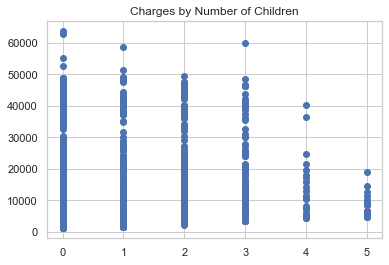

In [41]:
plt.scatter(df['children'],df['charges'])
plt.title('Charges by Number of Children')

To account for overplotting on a discrete variable, we should add some jitter and transparency.

Text(0.5, 1.0, 'Charges by Number of Children')

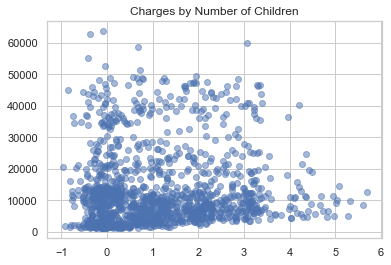

In [42]:
plt.scatter(df['children'] + stats.norm.rvs( 0, 0.3, df['children'].size ) , df['charges'], alpha=0.5)
plt.title('Charges by Number of Children')

Based on what we noted earlier about individuals with four or five children, as well as this scatter plot, it actually does seem like there is some structure. It appears that individuals with four or five children rarely pay more than \\$30,000. Of course, it is hard to tell due to the smaller amount of data points we have for people with four or five children. There are already comparatively fewer people who have high charges for their health insurance, and there are also comparatively few people with four or five children. It is reasonable that we simply don't have enough data to see the rest of the higher numbers filled out. However, it is also reasonable that perhaps people get some sort of discount given that they have enough children, like a cap on charges for large families to make insurance more affordable. 

<a id ="cvr"></a>
### Charges vs Region

Perhaps there are differences in how each region is charged. We can start off by looking at descriptive statistics according to each region.

In [43]:
describe_by_category(df,'charges','region')

           count          mean           std        min          25%  \
region                                                                 
northeast  324.0  13406.384516  11255.803066  1694.7964  5194.322288   
northwest  325.0  12417.575374  11072.276928  1621.3402  4719.736550   
southeast  364.0  14735.411438  13971.098589  1121.8739  4440.886200   
southwest  325.0  12346.937377  11557.179101  1241.5650  4751.070000   

                    50%         75%          max  
region                                            
northeast  10057.652025  16687.3641  58571.07448  
northwest   8965.795750  14711.7438  60021.39897  
southeast   9294.131950  19526.2869  63770.42801  
southwest   8798.593000  13462.5200  52590.82939  


There doesn't seem to be any significant differences between the regions, other than the fact that the minimum value for charges in the north seem to be higher than the south. 

We would've expected to see higher rates for the south as opposed to the north, as there are significantly higher rates of [obesity](https://www.cdc.gov/obesity/data/prevalence-maps.html) and [smoking](https://www.cdc.gov/statesystem/cigaretteuseadult.html) in souther regions of the United States. We haver previously seen one's charges get dramatically higher depending whether one smokes or are obese. 

However, we already know that the sample population is not representative, as our eaarlier EDA has revealed that the relative frequency of each region is nearly equal. This line of inquiry will probably not be very productive. 

Just to be safe, let us try a multiboxplot to see if there is anything we missed only by looking at the statistics.

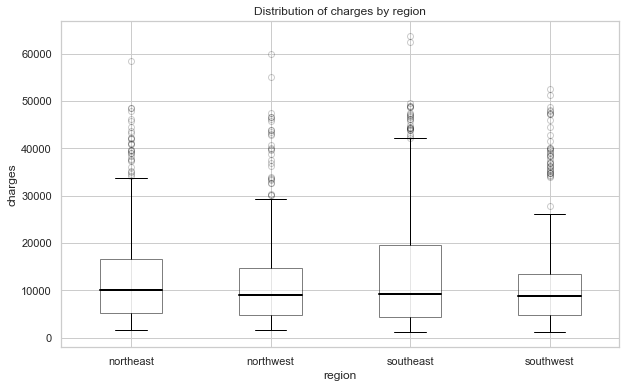

In [44]:
multiboxplot(df, 'charges','region')

It is harder to plot these categories on a scatter plot and jitter them like we did before in order to correct for overplotting. One option is that we can encode these regions with numeric values. 

[Text(0, 0, 'northeast'),
 Text(1, 0, 'northwest'),
 Text(2, 0, 'southeast'),
 Text(3, 0, 'southwest')]

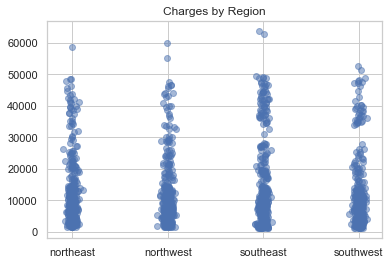

In [45]:
region_ids = {'northeast': 0, 'northwest': 1, 'southeast':2, 'southwest': 3}
df['region_id'] = df['region'].apply(lambda x: region_ids[x])
plt.scatter(df['region_id'] + stats.norm.rvs( 0, 0.03, df['region_id'].size ) , df['charges'], alpha=0.5)
plt.title('Charges by Region')
plt.xticks([0,1,2,3])
plt.gca().set_xticklabels(region_ids.keys())


We can see from this plot that, atleast for the south, there is a little bit of separation between "blobs" above and below the \\$30,000 mark. It is most clear in the Southwest. From the box and whisker plot that we made earlier, tall of these values were seen as outliers when they were plotted. For the northwest, the separation is not as clear, but values over \\$30,000 were also seen as outliers. This is unsurprising as it is rarer to have high valued charges anyway, as compared to most of the charges being rather low compared to \\$30,000. The more we subset the data, the more that these less common higher values will be seen as outliers.